In [256]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('DATA/GROUPED_data.csv')


# Visualisation 

In [257]:
df.columns

Index(['ECRAN', 'RAM', 'POIDS', 'PRIX', 'STOCKAGESSD', 'STOCKAGEHDD',
       'STOCKAGEFlash', '_Acer', '_Apple', '_Asus', '_Dell', '_HP', '_Lenovo',
       '_MSI', '_Toshiba', 'CPU_Modifier', 'CPU_Generation', 'CPU_AMD',
       'CPU_Intel', 'Grapihque_AMD Graphique', 'Grapihque_Intel HD Graphics',
       'Grapihque_Intel HD Graphics 400', 'Grapihque_Intel HD Graphics 520',
       'Grapihque_Intel HD Graphics 530', 'Grapihque_Intel HD Graphics 620',
       'Grapihque_Intel Iris', 'Grapihque_Nvidia  GTX', 'Grapihque_Nvidia  M',
       'Grapihque_Nvidia  MX', 'Grapihque_Nvidia GeForce 920', '_DELL', '_Hp',
       'ryzen', 'Grapihque_Intel HD Graphiques',
       'Grapihque_Intel UHD Graphics 620', 'Grapihque_Nvidia  Quadro',
       'Grapihque_carte graphiques intégré'],
      dtype='object')

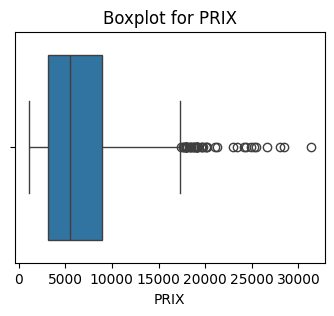

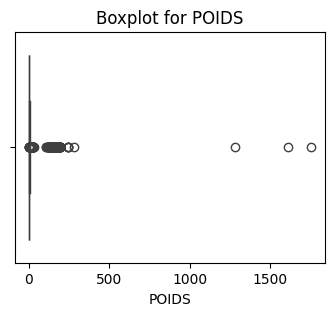

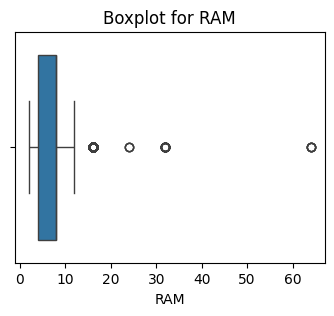

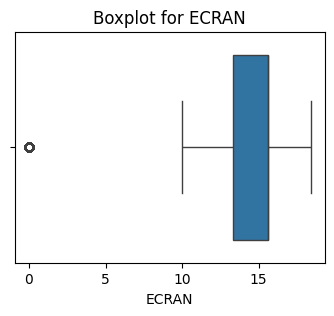

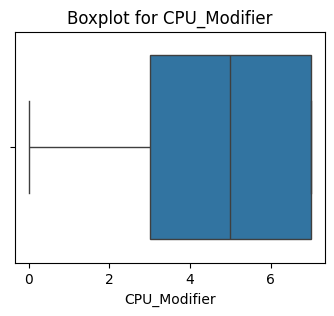

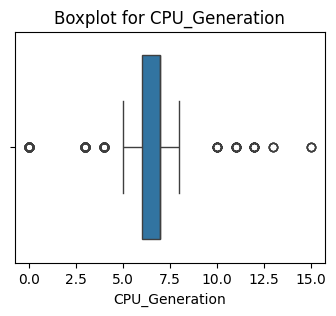

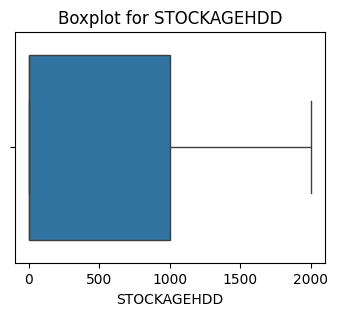

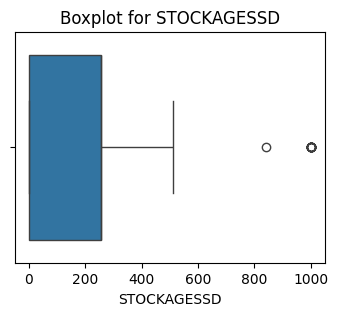

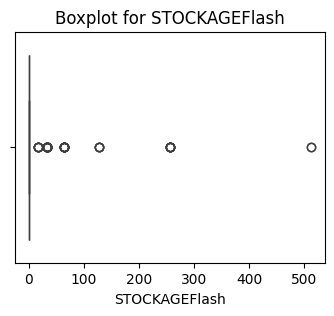

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['PRIX', 'POIDS', 'RAM','ECRAN','CPU_Modifier','CPU_Generation','STOCKAGEHDD','STOCKAGESSD','STOCKAGEFlash']  

for column in numerical_columns:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

We observe that outliers are exclusively present in the 'PIODS' column, with additional instances of null values in the 'ECRAN' column.
We intend to impute missing values in the 'ECRAN' column with the mean and filter out rows where the 'POIDS' values exceed 10 kilograms;

In [259]:
df['POIDS'] = df['POIDS'].apply(lambda x: 0 if x > 10 else x)
df['ECRAN'] = df['ECRAN'].apply(lambda x: df['ECRAN'].mean() if x==0 else x)

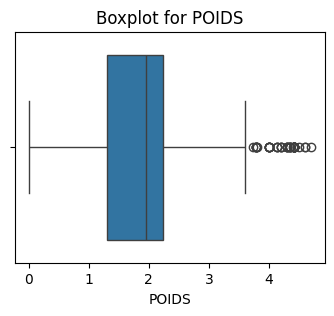

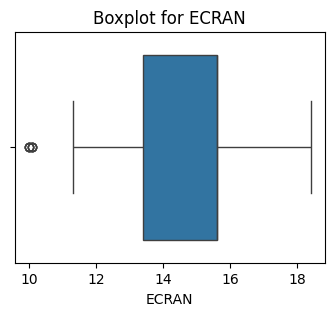

In [260]:

numerical_columns = ['POIDS','ECRAN']  
for column in numerical_columns:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


Finally, we observe that there are fewer values outside the expected range, and these values seem reasonable. Therefore, I opted to retain them, specifically those around 4 kilograms and 10 inches

### Stockage SSD

<Axes: xlabel='STOCKAGESSD'>

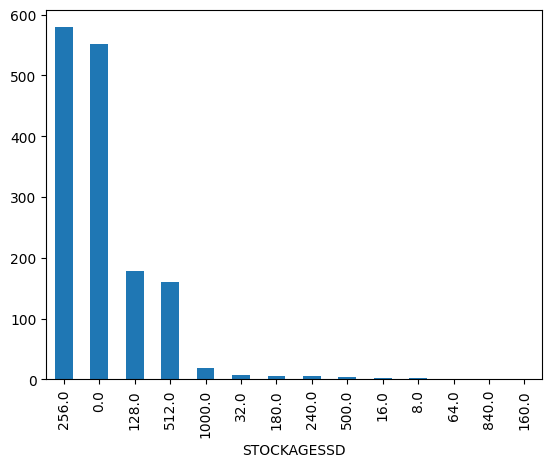

In [261]:
df['STOCKAGESSD'].value_counts().plot(kind='bar')

In [262]:
def replace_outliers_with_mean(data, column_name):
    valid_values = data[(data[column_name] >100)][column_name]
    mean_value = valid_values.mean()
    data[column_name] = data[column_name].apply(lambda x: mean_value if (x < 100 and x >0) else x)
    return data

df = replace_outliers_with_mean(df, 'STOCKAGESSD')


We have addressed the issue of storage SSD values below 100GB by replacing them with the mean value of the 'STOCKAGESSD' column. This approach allows us to handle the lower bounds while retaining existing 0 values.

<Axes: xlabel='STOCKAGESSD'>

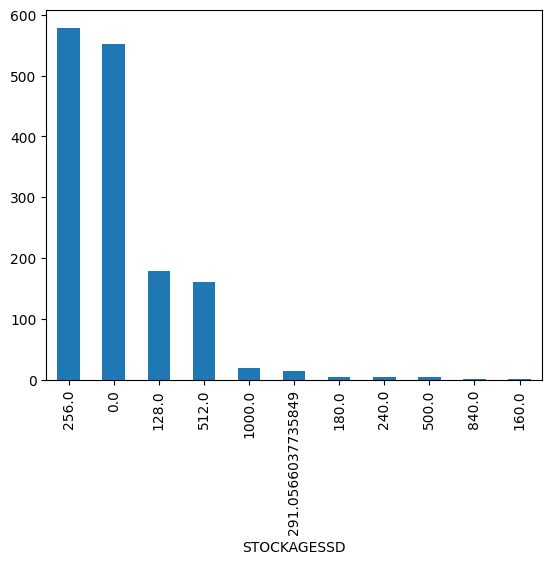

In [263]:
df['STOCKAGESSD'].value_counts().plot(kind='bar')

### STOCKAGEHDD

<Axes: xlabel='STOCKAGEHDD'>

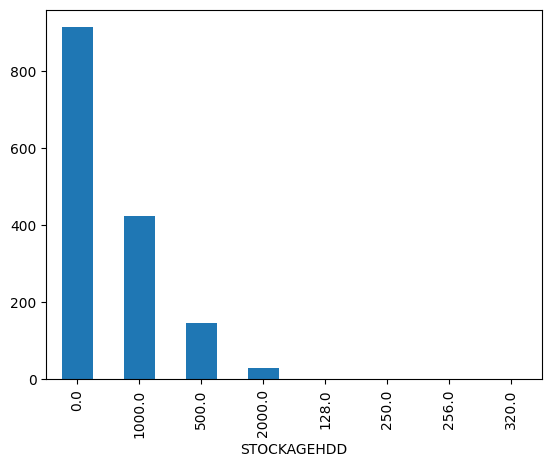

In [264]:
df['STOCKAGEHDD'].value_counts().plot(kind='bar')

Everything appears to be in order here; let's proceed to the next task.

### STOCKAGEFlash

In [265]:
df['STOCKAGEFlash'].value_counts()

STOCKAGEFlash
0.0      1456
32.0       31
64.0       13
256.0       8
16.0        6
128.0       4
512.0       2
Name: count, dtype: int64

We'll proceed to the next tasks as everything appears to be in order here.

### PRIX

In [266]:
df['PRIX'].describe()

count     1520.000000
mean      6707.620842
std       4429.513466
min       1112.486400
25%       3190.406400
50%       5556.038400
75%       8890.328000
max      31322.246400
Name: PRIX, dtype: float64

#### CPU_Modifier & CPU_Geneartion

In [267]:
Modifier_mode_value = df['CPU_Modifier'].mode().iloc[0]
Generation_mode_value = df['CPU_Generation'].mode().iloc[0]

df['CPU_Modifier'] = df['CPU_Modifier'].replace(0, Modifier_mode_value)
df['CPU_Generation'] = df['CPU_Generation'].replace(0, Generation_mode_value)

<Axes: xlabel='CPU_Modifier'>

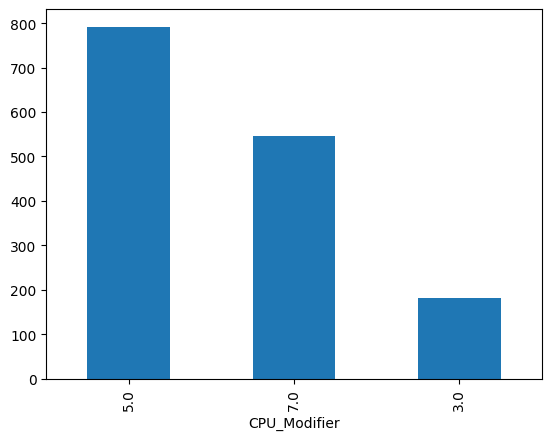

In [268]:
df['CPU_Modifier'].value_counts().plot(kind='bar')	

<Axes: xlabel='CPU_Generation'>

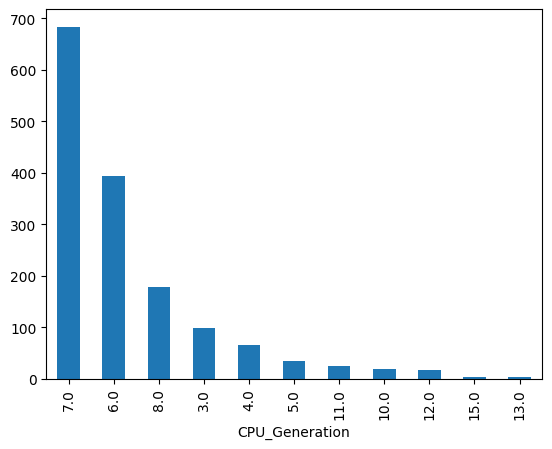

In [269]:
df['CPU_Generation'].value_counts().plot(kind='bar')

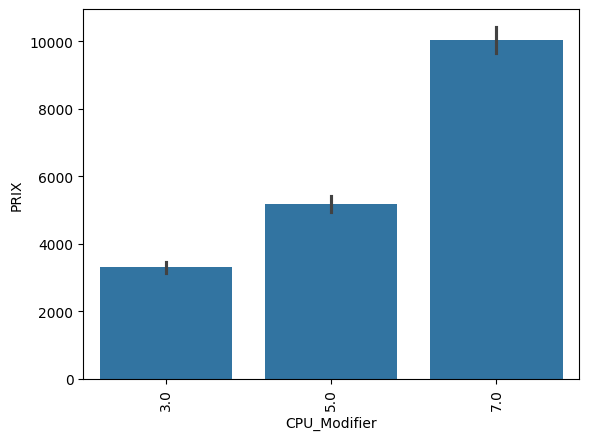

In [270]:
sns.barplot(x=df['CPU_Modifier'],y=df['PRIX'])
plt.xticks(rotation='vertical')
plt.show()

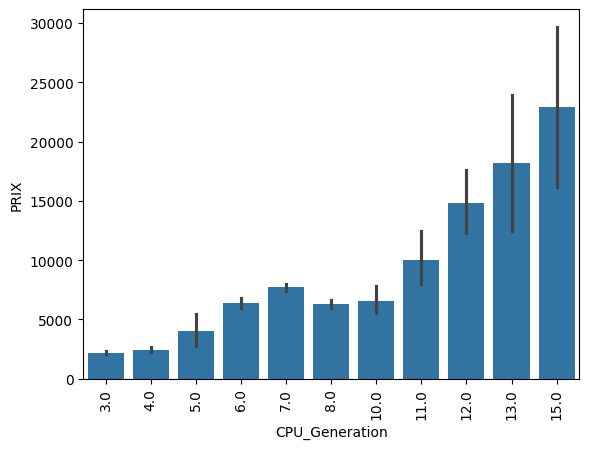

In [271]:
sns.barplot(x=df['CPU_Generation'],y=df['PRIX'])
plt.xticks(rotation='vertical')
plt.show()

### MARK

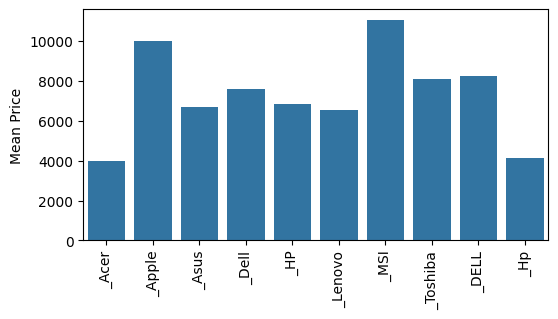

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns

company_columns = [col for col in df.columns if col.startswith('_')]

# Create subplots for each company
plt.figure(figsize=(6, 3))

# Lists to store company names and mean prices
companies = []
mean_prices = []

for company_column in company_columns:
    mean_price = df[df[company_column] == 1]['PRIX'].mean()
    
    companies.append(company_column)
    mean_prices.append(mean_price)

# Plot the bar chart
sns.barplot(x=companies, y=mean_prices)
plt.xticks(rotation='vertical')
plt.ylabel('Mean Price')
plt.show()


In [273]:

df = df.drop('_HP', axis=1, errors='ignore')

df = df.drop('_Dell', axis=1, errors='ignore')

### RAM

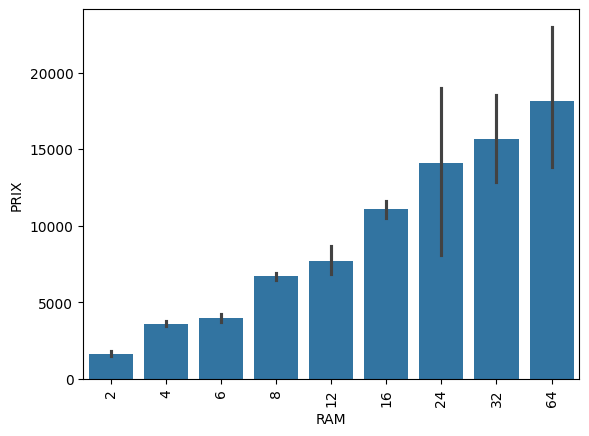

In [274]:
sns.barplot(x=df['RAM'],y=df['PRIX'])
plt.xticks(rotation='vertical')
plt.show()

## ECRAN

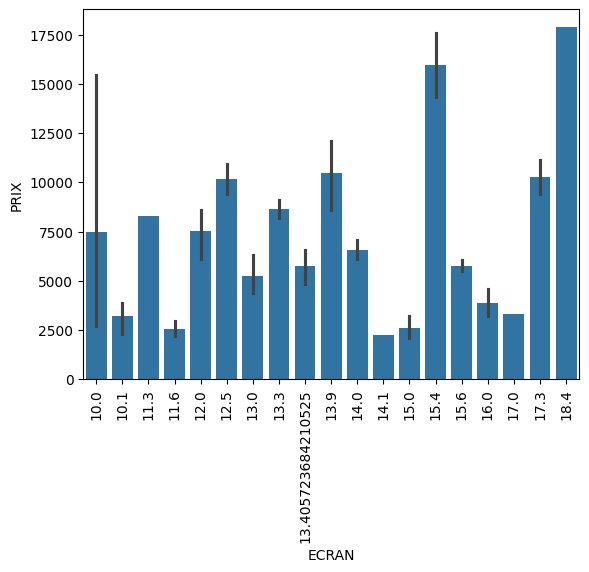

In [275]:
sns.barplot(x=df['ECRAN'],y=df['PRIX'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='RAM', ylabel='PRIX'>

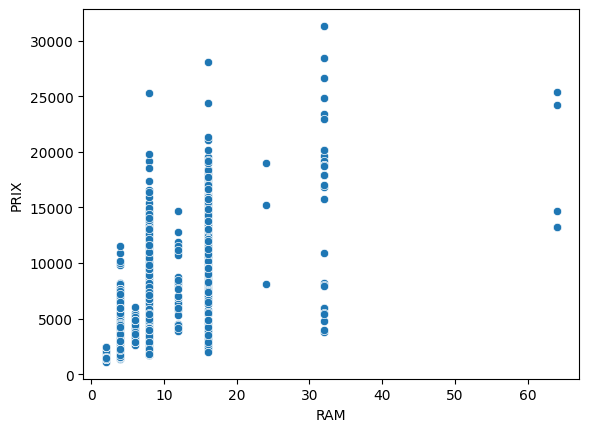

In [276]:
sns.scatterplot(x=df['RAM'],y=df['PRIX'])

## Graphiques

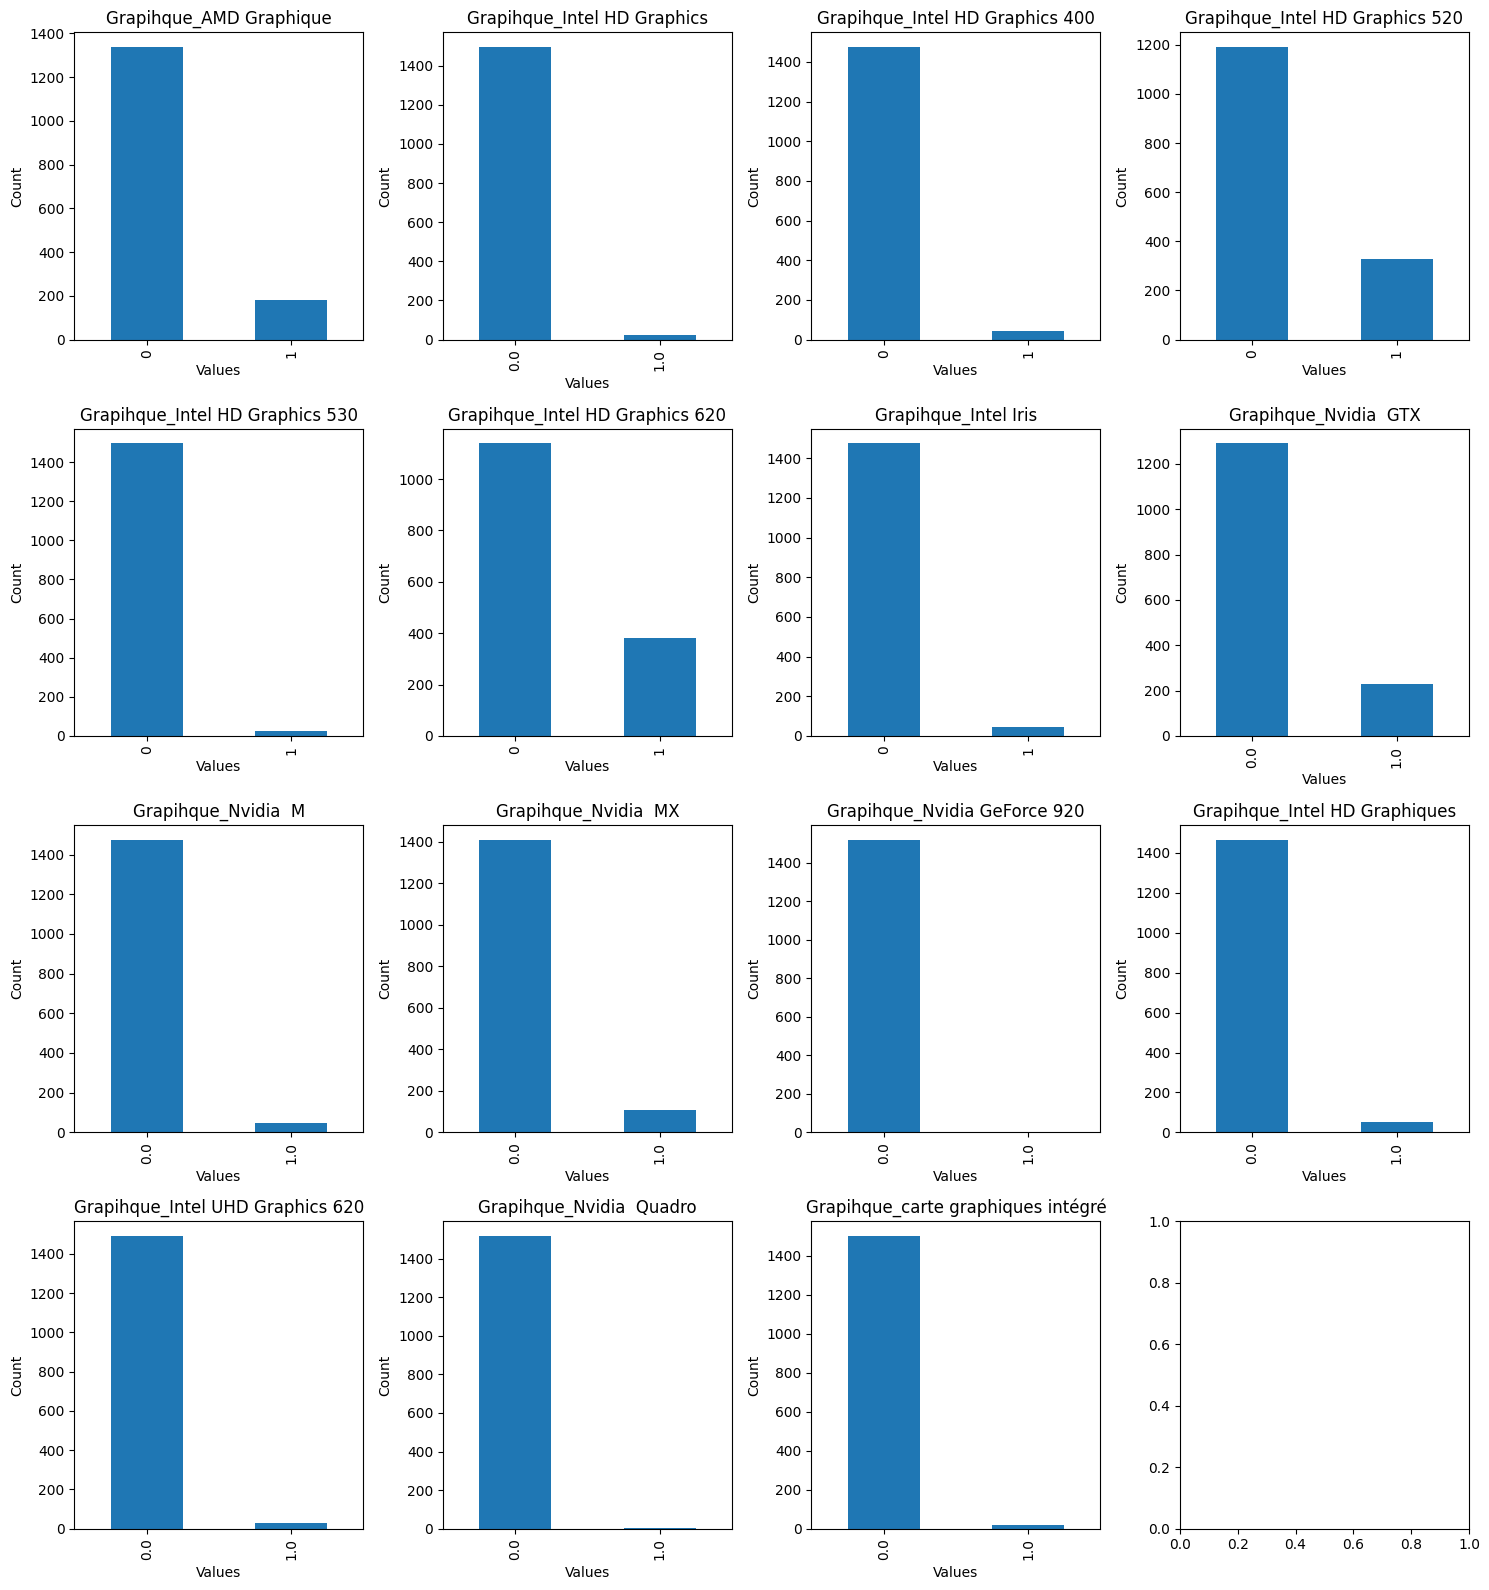

In [277]:
import matplotlib.pyplot as plt

graphique_columns = [col for col in df.columns if col.startswith('Grapihque')]
num_plots = len(graphique_columns)
fig, axes = plt.subplots(4, 4, figsize=(15,4*4))

# Flatten axes for easier iteration (this will create single dimention array with sublots
# (because our n_rows >1) the content of array will be somthing like(sublot1,subplot2 ,....)
axes = axes.flatten()

# Iterate through the columns and plot
for i, column in enumerate(graphique_columns):
    ax = axes[i]
    df[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Values')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


<Axes: xlabel='CPU_Modifier', ylabel='PRIX'>

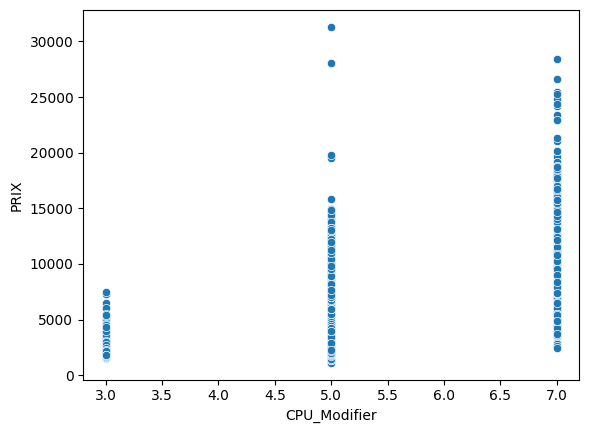

In [278]:
sns.scatterplot(x=df['CPU_Modifier'],y=df['PRIX'])

It seems that certain laptops with a CPU modifier of 5 have significantly higher prices compared to other laptops. It would be reasonable to consider removing these outliers, as they represent only a small number of laptops (less than 5)

In [279]:
filter = (df['CPU_Modifier'] == 5) & (df['PRIX'] > 18000)
df = df[~filter]

<Axes: xlabel='CPU_Modifier', ylabel='PRIX'>

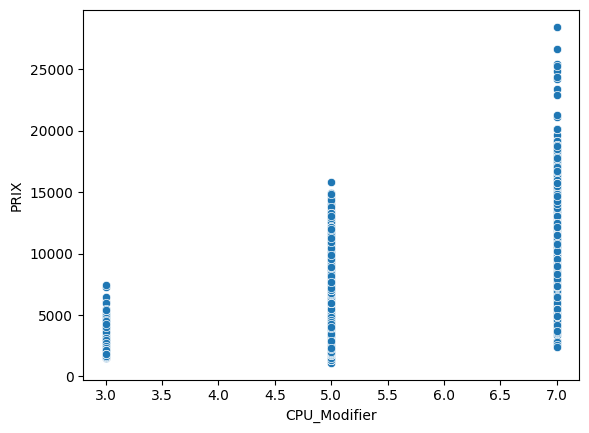

In [280]:
sns.scatterplot(x=df['CPU_Modifier'],y=df['PRIX'])

# Correlation

In [281]:
df.corr()['PRIX']

ECRAN                                 0.084234
RAM                                   0.605431
POIDS                                 0.198952
PRIX                                  1.000000
STOCKAGESSD                           0.623612
STOCKAGEHDD                          -0.027963
STOCKAGEFlash                        -0.010784
_Acer                                -0.165475
_Apple                                0.091474
_Asus                                 0.005045
_Lenovo                              -0.019834
_MSI                                  0.195090
_Toshiba                              0.060396
CPU_Modifier                          0.577696
CPU_Generation                        0.396249
CPU_AMD                              -0.112715
CPU_Intel                             0.112715
Grapihque_AMD Graphique              -0.127174
Grapihque_Intel HD Graphics          -0.114750
Grapihque_Intel HD Graphics 400      -0.178537
Grapihque_Intel HD Graphics 520      -0.185089
Grapihque_Int

In [282]:
df = df.drop('ryzen', axis=1, errors='ignore')

In [283]:
df = df.drop('ECRAN', axis=1, errors='ignore')

In [284]:
df.rename(columns={'POIDS': 'WEIGHT'}, inplace=True)

In [285]:
df.head()

,RAM,WEIGHT,PRIX,STOCKAGESSD,STOCKAGEHDD,STOCKAGEFlash,_Acer,_Apple,_Asus,_Lenovo,...,Grapihque_Nvidia GTX,Grapihque_Nvidia M,Grapihque_Nvidia MX,Grapihque_Nvidia GeForce 920,_DELL,_Hp,Grapihque_Intel HD Graphiques,Grapihque_Intel UHD Graphics 620,Grapihque_Nvidia Quadro,Grapihque_carte graphiques intégré
0,8,1.37,8565.441984,128.0,0.0,0.0,0.0,1.0,0,0,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
1,8,1.34,5747.462784,0.0,0.0,128.0,0.0,1.0,0,0,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
2,8,1.86,3676.320000,256.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0
3,16,1.83,16223.440320,512.0,0.0,0.0,0.0,1.0,0,0,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
4,8,1.37,11531.496960,256.0,0.0,0.0,0.0,1.0,0,0,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0


### Storing Final Data

In [286]:
df.to_csv('DATA/Final_data.csv', index=False)